# Importing Necessary Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Loading the Dataset

In [42]:
Df_CCC_Data = pd.read_csv('Credit Card Customer Data.csv')


# Summarizing the Dataset

In [43]:
Df_CCC_Data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [44]:
Df_CCC_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


# Performing EDA

In [45]:
Df_CCC_Data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


# Removing Unnecessary Columns

In [46]:
Df_CCC_Data = Df_CCC_Data.drop(['Sl_No'], axis=1)
Df_CCC_Data = Df_CCC_Data.drop(['Customer Key'], axis=1)

# Plotting Box Plot to find the outliers

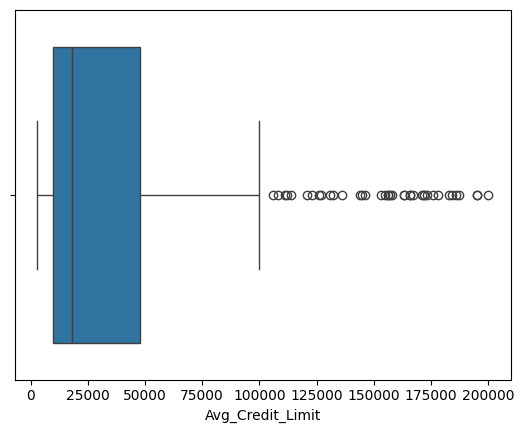

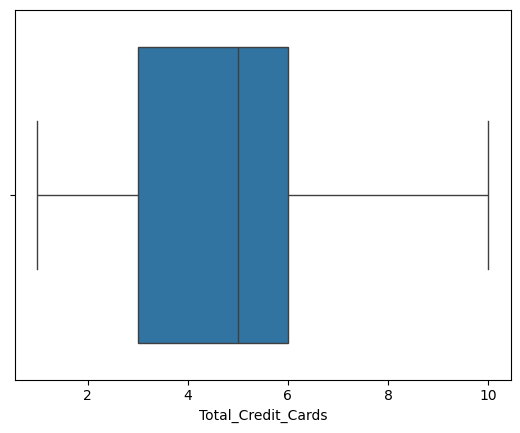

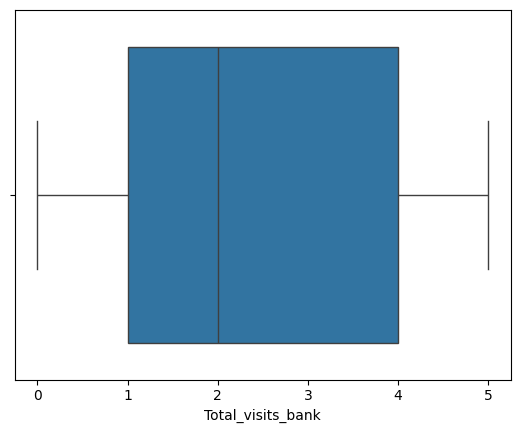

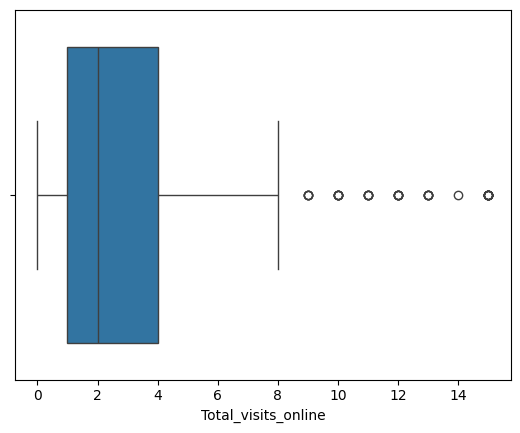

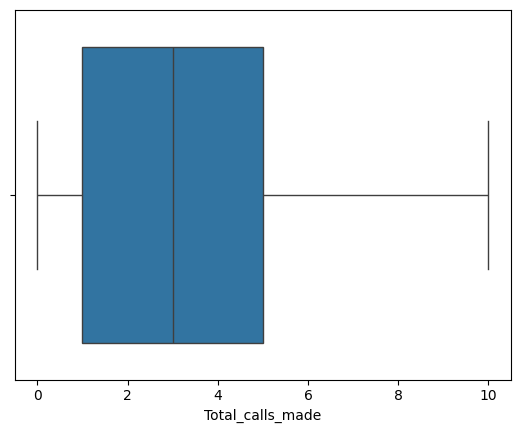

In [47]:
# prompt: Box plot for Df_CCC_Data

import seaborn as sns

# Create a boxplot for each column in Df_CCC_Data
for col in Df_CCC_Data.columns:
    sns.boxplot(x=Df_CCC_Data[col])
    plt.show()


# Converting the Dataset in DataFrame Format to Array

In [48]:
df =Df_CCC_Data
df_array = df.values

#Applying Standardization to the Dataset

In [49]:
scale = StandardScaler()

In [50]:
x = scale.fit_transform(df_array)

In [51]:
x

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

# Loading the Model

In [52]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

#Training the Model

## Smaples choosen based on number of coulumns -1 (5-1 =4)

In [53]:
model = DBSCAN(min_samples=4,eps=1)
model

DBSCAN(eps=1, min_samples=4)

In [54]:
model.fit(x)

DBSCAN(eps=1, min_samples=4)

In [55]:
set(list(model.labels_))

{-1, 0, 1}

## Merging the cluster_values to the Entire Dataset

In [56]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])
class_

,cluster_values
0,-1
1,-1
2,0
3,0
4,-1
...,...
655,1
656,1
657,1
658,1


In [57]:
final_df = pd.concat([df,class_],axis=1)
final_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,100000,2,1,1,0,-1
1,50000,3,0,10,9,-1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,-1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


In [58]:
input_x = final_df.iloc[:,:-1].values
input_x

array([[100000,      2,      1,      1,      0],
       [ 50000,      3,      0,     10,      9],
       [ 50000,      7,      1,      3,      4],
       ...,
       [145000,      8,      1,      9,      1],
       [172000,     10,      1,     15,      0],
       [167000,      9,      0,     12,      2]])

In [59]:
output_y = final_df.iloc[:,-1].values
output_y

array([-1, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

# Visualizing the Result

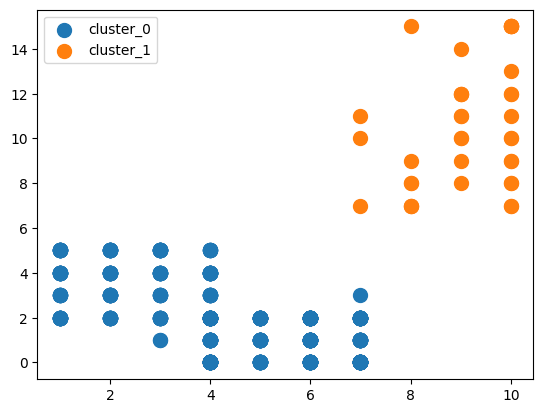

In [60]:
plt.scatter(input_x[output_y==0,1],input_x[output_y==0,3],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,1],input_x[output_y==1,3],s=100, label='cluster_1')
plt.legend()
plt.show()